# Предобработка данных и функции потерь в линейной регрессии

## Данные
Для демонстраций загрузим набор данных [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile). В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [1]:
import pandas as pd

In [5]:
pd.read_csv??

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [8]:
import pandas as pd
X_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [4]:
X_raw.head(10)

0      1            2    3      4     5            6    7      8      9   \
0   3    NaN  alfa-romero  gas    std   two  convertible  rwd  front   88.6   
1   3    NaN  alfa-romero  gas    std   two  convertible  rwd  front   88.6   
2   1    NaN  alfa-romero  gas    std   two    hatchback  rwd  front   94.5   
3   2  164.0         audi  gas    std  four        sedan  fwd  front   99.8   
4   2  164.0         audi  gas    std  four        sedan  4wd  front   99.4   
5   2    NaN         audi  gas    std   two        sedan  fwd  front   99.8   
6   1  158.0         audi  gas    std  four        sedan  fwd  front  105.8   
7   1    NaN         audi  gas    std  four        wagon  fwd  front  105.8   
8   1  158.0         audi  gas  turbo  four        sedan  fwd  front  105.8   
9   0    NaN         audi  gas  turbo   two    hatchback  4wd  front   99.5   

   ...   16    17    18    19    20     21      22  23  24       25  
0  ...  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  13495.0  
1  ...  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  16500.0  
2  ...  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  16500.0  
3  ...  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  13950.0  
4  ...  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  17450.0  
5  ...  136  mpfi  3.19  3.40   8.5  110.0  5500.0  19  25  15250.0  
6  ...  136  mpfi  3.19  3.40   8.5  110.0  5500.0  19  25  17710.0  
7  ...  136  mpfi  3.19  3.40   8.5  110.0  5500.0  19  25  18920.0  
8  ...  131  mpfi  3.13  3.40   8.3  140.0  5500.0  17  20  23875.0  
9  ...  131  mpfi  3.13  3.40   7.0  160.0  5500.0  16  22      NaN  

[10 rows x 26 columns]

In [5]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    float64
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      205 non-null    float64
 21  21      203 non-null    float64
 22  22

In [7]:
X_raw[25].isna().sum()

4

In [4]:
X_raw[25].notna()

0      True
1      True
2      True
3      True
4      True
       ... 
200    True
201    True
202    True
203    True
204    True
Name: 25, Length: 205, dtype: bool

In [9]:
X_raw = X_raw[X_raw[25].notna()]

In [10]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [11]:
X_raw.shape, len(y)

((201, 25), 201)

## Предобработка данных
Предобработка данных важна при применении любых методов машинного обучения, а в особенности для линейных моделей. В sklearn предобработку удобно делать с помощью модуля [preprocessing](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) или методов библиотеки pandas.

In [11]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 21.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 26.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.1 MB/s eta 0:00:00


In [12]:
from sklearn import impute

### Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:
* заполнить средними (mean, median);
* предсказывать пропущенные значения по непропущенным.

Последний вариант сложный и применяется редко. Для заполнения константами можно использовать метод датафрейма fillna, для замены средними - класс preprocessing.Imputer.

In [13]:
X_raw.fillna()

ValueError: Must specify a fill 'value' or 'method'.

In [14]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_raw.dtypes == "object").values # категориальные признаки имеют тип "object"

In [15]:
# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_cat.reset_index(drop=True, inplace=True)

X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

In [15]:
X_no_mis_real.shape, X_cat.shape, X_no_mis.shape

((201, 15), (201, 10), (201, 25))

In [16]:
X_no_mis.head()

0      1     9      10    11    12      13     16    18    19  ...  \
0  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
1  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
2  1.0  122.0  94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47  ...   
3  2.0  164.0  99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  ...   
4  2.0  164.0  99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40  ...   

            2    3    4     5            6    7      8     14    15    17  
0  alfa-romero  gas  std   two  convertible  rwd  front  dohc  four  mpfi  
1  alfa-romero  gas  std   two  convertible  rwd  front  dohc  four  mpfi  
2  alfa-romero  gas  std   two    hatchback  rwd  front  ohcv   six  mpfi  
3         audi  gas  std  four        sedan  fwd  front   ohc  four  mpfi  
4         audi  gas  std  four        sedan  4wd  front   ohc  five  mpfi  

[5 rows x 25 columns]

In [17]:
X_no_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    float64
 1   1       201 non-null    float64
 2   9       201 non-null    float64
 3   10      201 non-null    float64
 4   11      201 non-null    float64
 5   12      201 non-null    float64
 6   13      201 non-null    float64
 7   16      201 non-null    float64
 8   18      201 non-null    float64
 9   19      201 non-null    float64
 10  20      201 non-null    float64
 11  21      201 non-null    float64
 12  22      201 non-null    float64
 13  23      201 non-null    float64
 14  24      201 non-null    float64
 15  2       201 non-null    object 
 16  3       201 non-null    object 
 17  4       201 non-null    object 
 18  5       201 non-null    object 
 19  6       201 non-null    object 
 20  7       201 non-null    object 
 21  8       201 non-null    object 
 22  14

Всегда нужно осознавать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

__Пример:__ предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков рекомендуется создавать отдельную категорию, соответствующую пропущенному значению. В наши данных пропусков в категориальных признаках нет.

### Преобразование нечисловых признаков
Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам. 

__Пример:__ некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества $K$. К таким признакам обычно применяют [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) (вместо одного признака создают $K$ бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать с помощью классов LabelEncoder + OneHotEncoding, но проще использовать функцию pd.get_dummies.

Следует заметить, что в новой матрице будет очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр OneHotEncoder(sparse = True) или .get_dummies(sparse=True), и метод вернет [разреженную матрицу](http://docs.scipy.org/doc/scipy/reference/sparse.html), в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

__Вопрос:__ какая проблема возникнет при применении такого способа кодирования для обучения линейной регрессии?
    
Необходимо удалить один из столбцов, созданных для каждого признака. Для этого в get_dummies надо поставить drop_first=True.

In [16]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(X_dum.shape)
X_dum.head()

(201, 65)


0      1     9     10    11    12      13     16    18    19  ...  \
0  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
1  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
2  1.0  122.0  94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47  ...   
3  2.0  164.0  99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  ...   
4  2.0  164.0  99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40  ...   

   15_three  15_twelve  15_two  17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  \
0     False      False   False    False    False   False   False     True   
1     False      False   False    False    False   False   False     True   
2     False      False   False    False    False   False   False     True   
3     False      False   False    False    False   False   False     True   
4     False      False   False    False    False   False   False     True   

   17_spdi  17_spfi  
0    False    False  
1    False    False  
2    False    False  
3    False    False  
4    False    False  

[5 rows x 65 columns]

Помимо категориальных, преобразования требуют, например, строковые признаки. Их можно превращать в матрицу частот слов [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer), матрицу частот буквосочетаний фиксированной длины, можно извлекать другие признаки (например, длина строки).

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу.  Это важно по нескольким причинам:
* ускорение обучения модели (пояснение на лекции);
* улучшение численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем с области больших чисел)
* для линейных моделей: интерпретация весов при признаках как меры их значимости.

Первый популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение (StandardScaler в sklearn). Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (MinMaxScaler в sklearn).

In [20]:
X_dum

0      1      9     10    11    12      13     16    18    19  ...  \
0    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
1    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
2    1.0  122.0   94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47  ...   
3    2.0  164.0   99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  ...   
4    2.0  164.0   99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40  ...   
..   ...    ...    ...    ...   ...   ...     ...    ...   ...   ...  ...   
196 -1.0   95.0  109.1  188.8  68.9  55.5  2952.0  141.0  3.78  3.15  ...   
197 -1.0   95.0  109.1  188.8  68.8  55.5  3049.0  141.0  3.78  3.15  ...   
198 -1.0   95.0  109.1  188.8  68.9  55.5  3012.0  173.0  3.58  2.87  ...   
199 -1.0   95.0  109.1  188.8  68.9  55.5  3217.0  145.0  3.01  3.40  ...   
200 -1.0   95.0  109.1  188.8  68.9  55.5  3062.0  141.0  3.78  3.15  ...   

     15_three  15_twelve  15_two  17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  \
0       False      False   False    False    False   False   False     True   
1       False      False   False    False    False   False   False     True   
2       False      False   False    False    False   False   False     True   
3       False      False   False    False    False   False   False     True   
4       False      False   False    False    False   False   False     True   
..        ...        ...     ...      ...      ...     ...     ...      ...   
196     False      False   False    False    False   False   False     True   
197     False      False   False    False    False   False   False     True   
198     False      False   False    False    False   False   False     True   
199     False      False   False    False    False    True   False    False   
200     False      False   False    False    False   False   False     True   

     17_spdi  17_spfi  
0      False    False  
1      False    False  
2      False    False  
3      False    False  
4      False    False  
..       ...      ...  
196    False    False  
197    False    False  
198    False    False  
199    False    False  
200    False    False  

[201 rows x 65 columns]

In [17]:
X_dum.columns = X_dum.columns.astype('str')

In [22]:
X_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                201 non-null    float64
 1   1                201 non-null    float64
 2   9                201 non-null    float64
 3   10               201 non-null    float64
 4   11               201 non-null    float64
 5   12               201 non-null    float64
 6   13               201 non-null    float64
 7   16               201 non-null    float64
 8   18               201 non-null    float64
 9   19               201 non-null    float64
 10  20               201 non-null    float64
 11  21               201 non-null    float64
 12  22               201 non-null    float64
 13  23               201 non-null    float64
 14  24               201 non-null    float64
 15  2_audi           201 non-null    bool   
 16  2_bmw            201 non-null    bool   
 17  2_chevrolet     

In [18]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)

In [25]:
preprocessing.StandardScaler()

StandardScaler()

In [26]:
X.head()

0         1         2         3         4         5         6         7   \
0  1.0  0.298429  0.058309  0.413433  0.324786  0.083333  0.411171  0.260377   
1  1.0  0.298429  0.058309  0.413433  0.324786  0.083333  0.411171  0.260377   
2  0.6  0.298429  0.230321  0.449254  0.444444  0.383333  0.517843  0.343396   
3  0.8  0.518325  0.384840  0.529851  0.504274  0.541667  0.329325  0.181132   
4  0.8  0.518325  0.373178  0.529851  0.521368  0.541667  0.518231  0.283019   

         8         9   ...   55   56   57   58   59   60   61   62   63   64  
0  0.664286  0.290476  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1  0.664286  0.290476  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.100000  0.666667  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3  0.464286  0.633333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.464286  0.633333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 65 columns]

### Обучение модели и оценка качества

In [19]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=123)

In [30]:
ytrain

115    16630.0
43      6785.0
197    16515.0
196    15985.0
110    13860.0
        ...   
18      5151.0
101    13499.0
69     28176.0
130     9295.0
112    16900.0
Name: 25, Length: 150, dtype: float64

Сначала обучим классическую линейную регрессию, работающую по аналитической формуле.

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain, ytrain)

LinearRegression()

In [21]:
pred_mse = model.predict(Xtest)

In [22]:
from sklearn.metrics import r2_score

r2_score(ytest, pred_mse)

-1.1996134354086973e+24

In [23]:
r2_score(ytrain, model.predict(Xtrain))

0.9752578191555004

In [36]:
ytrain.shape

(150,)

In [37]:
r2_score(ytrain, [ytrain.mean()]*ytrain.shape[0])

0.0

Сильно переобучились.

Добавим регуляризацию:

*  L1-регуляризация: Lasso
*  L2-регуляризация: Ridge
*  L1+L2: ElasticNet

In [24]:
from sklearn.linear_model import Ridge

model_l2 = Ridge(alpha=1)

model_l2.fit(Xtrain, ytrain)

pred_l2 = model_l2.predict(Xtest)

r2_score(ytest, pred_l2)

0.8315766274428095

In [25]:
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha=3.5)

model_l1.fit(Xtrain, ytrain)

pred_l1 = model_l1.predict(Xtest)

r2_score(ytest, pred_l1)

0.8211820607770752

In [26]:
from sklearn.linear_model import ElasticNet

model_l2 = ElasticNet(alpha=0.5, l1_ratio=0)

model_l2.fit(Xtrain, ytrain)

pred_l2 = model_l2.predict(Xtest)

r2_score(ytest, pred_l2)

/mnt/sdb1/Работа/Преподавание/Анализ данных в питоне 2024/Python_git/myenv/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+09, tolerance: 1.041e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.43902281937096044

In [27]:
ytrain

115    16630.0
43      6785.0
197    16515.0
196    15985.0
110    13860.0
        ...   
18      5151.0
101    13499.0
69     28176.0
130     9295.0
112    16900.0
Name: 25, Length: 150, dtype: float64

In [29]:
model.coef_

array([-1.55486035e+03, -5.83063329e+03,  6.88736881e+03, -6.97162213e+03,
        8.03796598e+03, -5.24831458e+03,  1.88373482e+04,  4.44996163e+04,
       -1.66422281e+04, -5.51857388e+03, -1.23171984e+04, -2.95399045e+03,
        5.03825749e+03, -8.15673353e+03,  1.26452477e+04,  9.69286934e+03,
        1.17789002e+04,  3.92321288e+02,  3.77876776e+02,  5.26043756e+03,
       -2.55973218e+02, -5.16562445e+01,  3.06812960e+03,  6.65663453e+03,
        9.13796573e+15, -4.54628486e+01,  2.79564291e+03, -1.31506757e+17,
        2.21574277e+02,  4.55443334e+16,  3.03282737e+03,  9.22280071e+03,
        2.75438483e+16,  1.01600000e+03,  3.96400000e+03,  2.20400000e+03,
        3.92587854e+15,  2.80400000e+03, -2.06400000e+03, -1.52400000e+03,
       -3.77600000e+03, -3.80000000e+03, -2.97175000e+03, -3.47600000e+03,
       -2.21000000e+02,  3.36975000e+03, -1.80004851e+16,  1.31506757e+17,
        1.32000000e+02, -2.75438483e+16, -1.28600000e+03, -4.12096667e+16,
        3.15600000e+03,  

In [28]:
model_l1.coef_

array([   -0.        , -4678.74432468,  2640.87238376, -2483.31738667,
        7705.51127903, -2514.91401517, 14856.48358703, 16556.50974328,
       -3257.15632461, -1858.15953361,    -0.        ,  2281.30672238,
        4212.11495416,    -0.        ,  3847.46517895,  4087.90212444,
        7500.33951851,  -865.23772694, -1088.62862203,     0.        ,
       -2382.39243814,  2391.24236446,   248.06899447,  3882.6897738 ,
           0.        , -1827.13211867,  -531.94729711, -2110.73398692,
       -1304.93580515, 13799.90777383,  -842.42365247,  2668.68498603,
          -0.        , -1770.0437185 ,   101.79414941, -1623.87170897,
         -50.67688899,  2248.68461029,  -278.10132443,     0.        ,
       -3171.19696779, -2445.13919958, -1758.46674971, -2766.45416663,
        -657.74750016,  2160.71502431,   289.70867306,    -0.        ,
         987.95480089,   204.90743967, -1769.92037457,   828.32994417,
       -5159.08512391, -3263.13321299, -2875.18208381,  1339.31940036,
      

In [54]:
model_l2.coef_

array([  -44.08247388,    25.47103765,   633.10785973,   798.67526678,
         948.87584294,    58.39820474,  1133.17928594,  1057.92978111,
         667.34625686,   162.05745983,    91.47415943,  1051.17864307,
         -85.7093476 ,  -792.11768118,  -805.48928823,   114.87616534,
         600.76292011,   -64.56635483,   -90.77839007,  -221.73923466,
        -123.3716728 ,   441.39943296,  -131.04992826,   915.57514486,
           0.        ,  -124.62865456,  -387.03958968,  -190.97546748,
        -128.35195981,   505.65149651,   -72.07933304,    92.7469086 ,
        -314.97186915,  -615.01333665,  -161.2398629 ,    25.27204328,
        -188.75616718,   475.64333513,    -8.31143895,    22.48725242,
         308.78107129,  -865.88343606,   551.93921941,  -360.65768129,
       -1544.11541261,  1651.34558395,   505.65149651,  -236.40543806,
        -441.82985775,   190.67962736,   438.38896334,   -55.89380591,
         477.73810153, -2081.54241706,   995.2237902 ,   -45.42997057,
      

In [40]:
model_l2.intercept_

8685.911220016162

In [36]:
r2_score(ytrain, model_l2.predict(Xtrain))

0.9533372216376615

Переобучение снизили!

Можно обучать регрессию градиентным спуском.

In [31]:
from sklearn.linear_model import SGDRegressor

lr_mse = SGDRegressor(loss= 'squared_error')

lr_mse.fit(Xtrain, ytrain)

pred_mse = lr_mse.predict(Xtest)

r2_score(ytest, pred_mse)

0.8277580538200165

А можно использовать не MSE, а MAE при обучении модели.

In [32]:
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, eta0=0.9)

lr_mae.fit(Xtrain, ytrain)

pred_mae = lr_mae.predict(Xtest)

r2_score(ytest, pred_mae)

/mnt/sdb1/Работа/Преподавание/Анализ данных в питоне 2024/Python_git/myenv/lib64/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.4158465365516745

### Бонус: cреднеквадратичная и средняя абсолютная ошибка
Кроме требований заказчика, функционал качества должен учитывать математические особенности модели, например устойчивость к шумовым объектам. В линейной регрессии Mean Squared Error: $L(y_i, a(x_i)) = (a(x_i) - y_i)^2$ не обладает этим свойством, потому что задает очень большие штрафы за большие отклонения от фактического значения. 

Рассмотрим это явление на примере. Выберем один признак, от которого целевой признак (имеющий индекс 15 в матрице X) зависит практически линейно. Добавим к выборке два объекта-выброса и посмотрим, как изменится оптимизированная на MSE прямая.

In [67]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
import numpy as np

In [68]:
X[15].values

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
X_subset = X[[7, 15]].values
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]])) # добавление двух шумовых точек

In [70]:
X_subset

array([[0.26037736, 0.        ],
       [0.26037736, 0.        ],
       [0.34339623, 0.        ],
       [0.18113208, 1.        ],
       [0.28301887, 1.        ],
       [0.28301887, 1.        ],
       [0.28301887, 1.        ],
       [0.28301887, 1.        ],
       [0.26415094, 1.        ],
       [0.17735849, 0.        ],
       [0.17735849, 0.        ],
       [0.38867925, 0.        ],
       [0.38867925, 0.        ],
       [0.38867925, 0.        ],
       [0.55849057, 0.        ],
       [0.55849057, 0.        ],
       [0.55849057, 0.        ],
       [0.        , 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.13962264, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.13962264, 0.        ],
       [0.23018868, 0.        ],
       [0.35849057, 0.        ],
       [0.11698113, 0.        ],
       [0.

In [71]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    lr = LR()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])  # найдем веса линейной модели
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)   # визуализируем прямую

Text(0.5, 0, 'x')

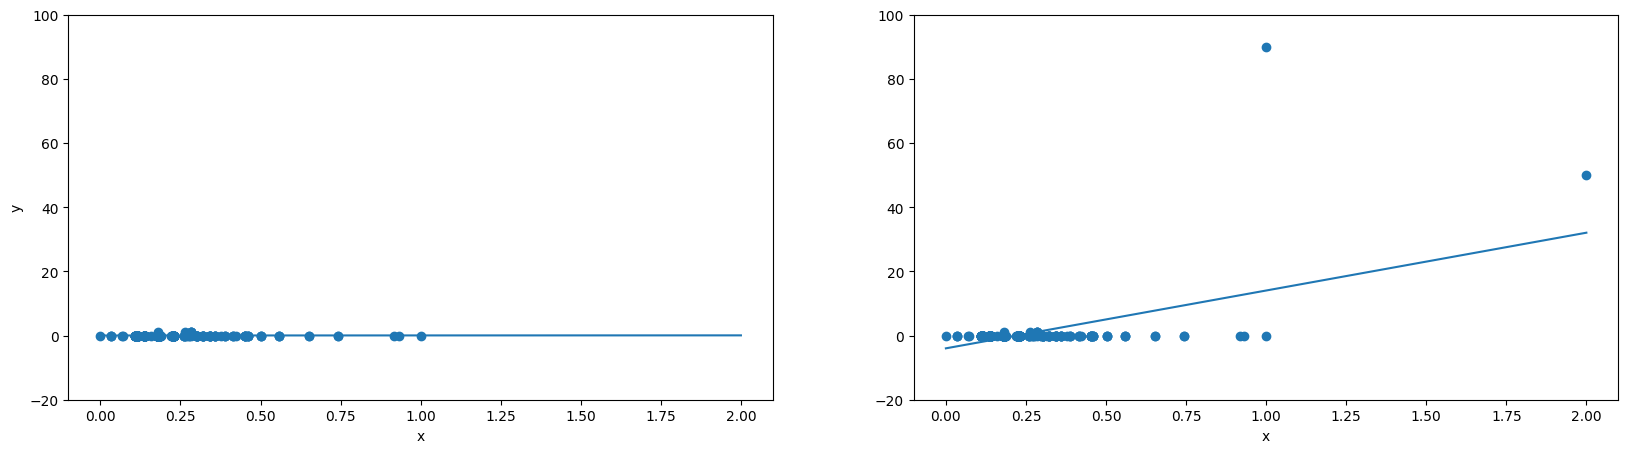

In [72]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто используют Mean Absoulte Error: $L(y_i, a(x_i)) = |a(x_i) - y_i|$:

Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [51]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 19.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 18.0 MB/s eta 0:00:00


In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
def scatter_points_and_plot_line_MAE(X_subset):
    mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset, columns=["f7", "f15"])) # задаем зависимость и передаем данные
    res = mod.fit(q=0.5)
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    grid = np.linspace(0, 2, 100)
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
    return mod, res

/Users/aarysmyatova/miniconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/Users/aarysmyatova/miniconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/Users/aarysmyatova/miniconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0


Text(0.5, 0, 'x')

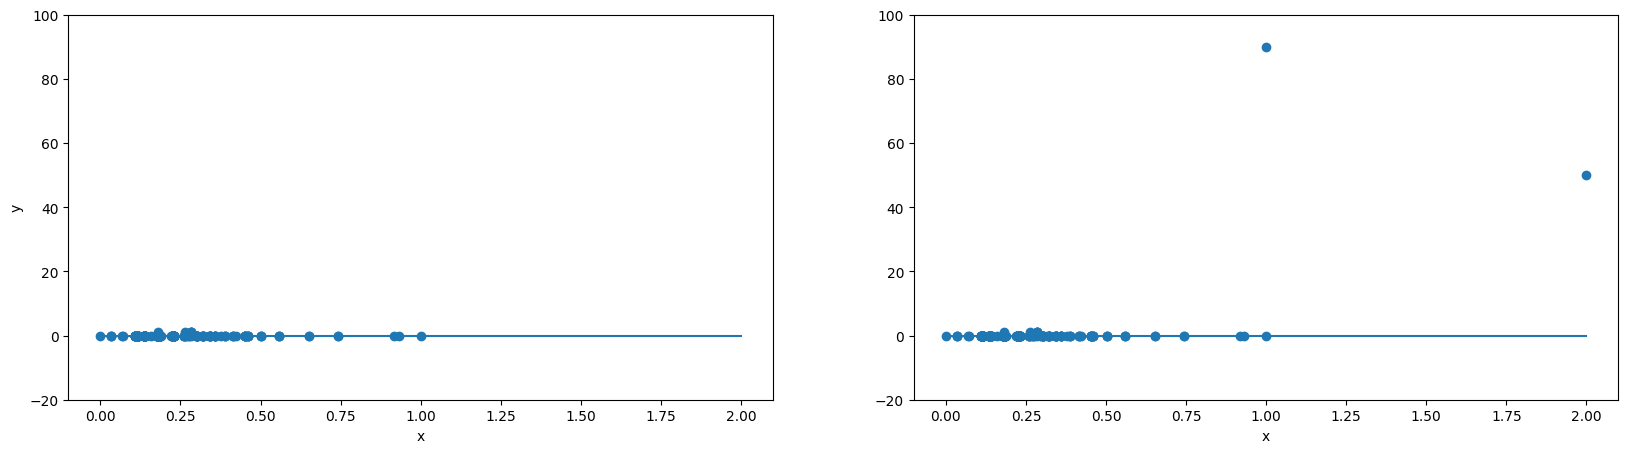

In [75]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [76]:
X_subset_modified_twice = np.vstack((X_subset_modified, np.random.randint(5, size=60).reshape(-1, 2)*[1, 30])) # добавление двух шумовых точек

/Users/aarysmyatova/miniconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/Users/aarysmyatova/miniconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/Users/aarysmyatova/miniconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0


Text(0.5, 0, 'x')

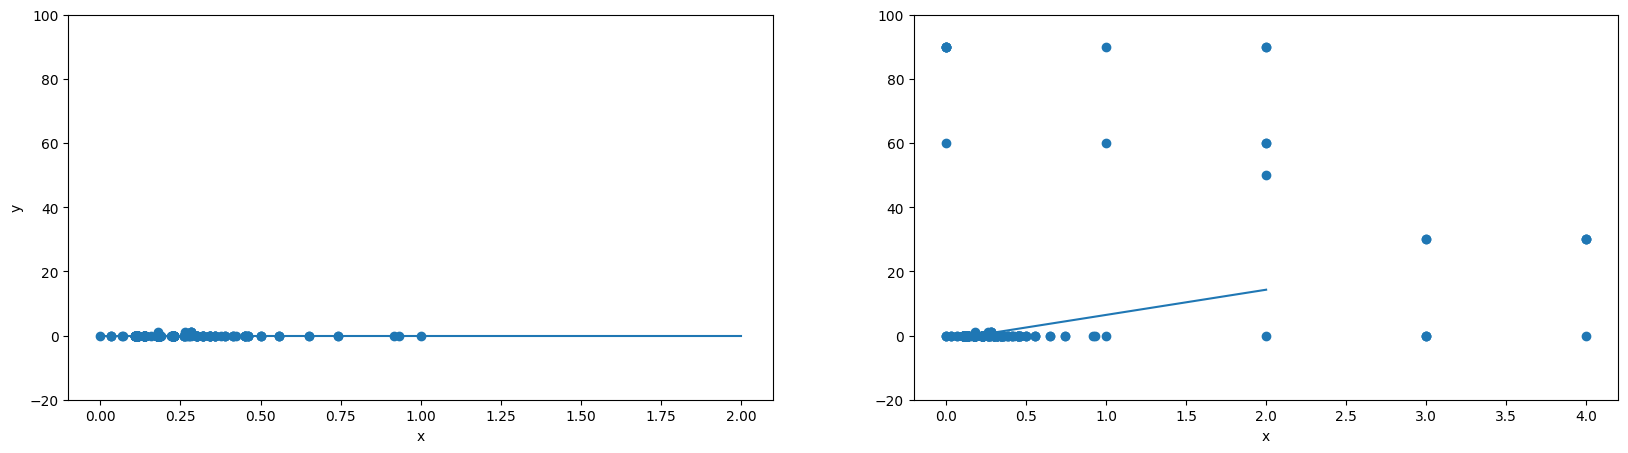

In [77]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified_twice)
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая изменила наклон, когда мы добавили 30 (почти 15%) шумовых точек.